In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [10]:
geo = gpd.read_file('data/all.json')

In [11]:
geo

,audit_task_id,label_id,gsv_panorama_id,label_type,severity,correct,high_quality_user,geometry
0,18604,85055,NjPAkwTxWsayAq3kCugvdA,CurbRamp,1.0,None,False,POINT (-122.33279 47.61860)
1,18608,85057,f_Mibt-6nJU7HTN7kx5ZGQ,Obstacle,2.0,True,False,POINT (-122.33189 47.61781)
2,18608,85059,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33183 47.61751)
3,18608,85060,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33188 47.61752)
4,18608,85062,f_Mibt-6nJU7HTN7kx5ZGQ,CurbRamp,1.0,None,False,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...
195539,76181,231270,R-sTl5O6sOdVPurgTWy3EQ,CurbRamp,1.0,None,True,POINT (-122.26726 47.54077)
195540,76183,231285,N5MrAAtHZO2JGXUrYAYnSQ,NoSidewalk,5.0,None,True,POINT (-122.26344 47.55229)
195541,76193,231338,d3oBrJ-nDtKMwlE7svc6pg,CurbRamp,1.0,None,True,POINT (-122.28179 47.56327)
195542,76193,231339,AOIBJ12BjFanDJF1Ark05Q,CurbRamp,1.0,None,True,POINT (-122.28165 47.56347)


In [12]:
geo = geo.drop(columns=['gsv_panorama_id'])

In [6]:
meta = pd.read_json('data/cvMetadata.json')

In [7]:
meta

,label_id,gsv_panorama_id,label_type_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch
0,85053,3sAn6u8bQPVW3hTDfNUP1w,1,0,0,0,16384.0,8192.0,2484,-390,720,480,62,232,1,107.750000,-15.625000,270.675171,0.168884
1,85004,CpU83mS7vz17EnE02JGOkg,1,0,0,0,16384.0,8192.0,394,-389,720,480,149,254,1,41.750000,-10.375000,129.873657,0.026001
2,85024,RDV4HddwNqwfBZndZRqqkA,1,0,0,0,16384.0,8192.0,3867,-135,720,480,386,187,1,100.437500,-12.625000,128.847916,0.042198
3,85025,NpkOF1LfE024Ks0XIhCttw,1,0,1,0,13312.0,6656.0,5484,-295,720,480,435,222,1,136.062500,-11.500000,350.971405,1.353600
4,85034,-l9SjmKbZmUfr3JV3PuTVg,1,1,0,0,13312.0,6656.0,7887,-504,720,480,584,247,1,180.312500,-15.562500,171.933517,-0.698708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195539,96388,Ek8nn67kKNgCFjZkKf9ISA,7,0,0,0,16384.0,8192.0,12898,-166,720,480,364,259,2,348.645081,-3.973214,318.706665,0.226311
195540,122316,6U9DDI4UppbHDTyp8_J3JA,2,2,0,0,16384.0,8192.0,13246,-636,720,480,327,145,1,3.171875,-32.000000,186.167953,0.891960
195541,122337,lydaO-3xUm3YPy2sNPyPoQ,4,2,0,0,16384.0,8192.0,10316,-614,720,480,302,220,1,288.500000,-20.250000,181.292786,5.152237
195542,122341,ubr500pdt0vImqg71_dHsQ,1,1,0,0,16384.0,8192.0,7437,-322,720,480,377,148,1,198.312500,-23.562500,180.803787,3.150978


In [13]:
meta = meta.drop(columns=['label_type_id'])

In [14]:
labels = pd.merge(geo, meta, on='label_id')

<AxesSubplot: >

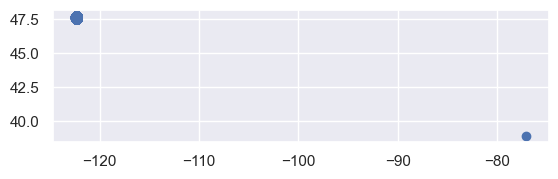

In [18]:
labels.plot()

In [19]:
labels =labels[labels['geometry'].x < -120]

In [21]:
# save the data as a geojson file
labels.to_file('data/labels.geojson', driver='GeoJSON')

In [22]:
# ground truth dataset
gt = pd.read_csv('data/jon-mikey-validated-labels-seattle.csv')

In [24]:
gt

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12866,232967,t,f
12867,232968,t,f
12868,232969,t,f
12869,232974,t,f


In [27]:
id_list= gt['label_id'].unique().tolist()
gt_labels = labels[labels['label_id'].isin(id_list)]

In [28]:
gt_labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,geometry,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch
135,19418,86788,SurfaceProblem,2.0,True,False,POINT (-122.28125 47.69831),BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869
457,21038,91037,CurbRamp,NaN,True,True,POINT (-122.31625 47.55795),g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782
635,22195,93842,CurbRamp,1.0,True,True,POINT (-122.32889 47.59998),npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354
653,47238,190528,CurbRamp,1.0,True,True,POINT (-122.33860 47.69603),KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160
654,47291,190672,CurbRamp,1.0,True,True,POINT (-122.28343 47.54610),00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195175,16991,80049,CurbRamp,1.0,True,True,POINT (-122.28789 47.52785),rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684
195176,16991,80051,CurbRamp,1.0,True,True,POINT (-122.28797 47.52796),rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684
195256,17700,82303,CurbRamp,3.0,None,True,POINT (-122.29849 47.54032),eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411
195318,18083,83398,CurbRamp,NaN,True,False,POINT (-122.37522 47.53018),9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842


In [29]:
# save the data as a geojson file
gt_labels.to_file('data/gt_labels.geojson', driver='GeoJSON')

In [3]:
#read in the geojson file
attributes = gpd.read_file('data/attributesWithLabels.json')

In [3]:
attributes.drop(columns=['label_date'], inplace=True)

In [15]:
#select label_tags label_description and label_id
optional_input = attributes[['label_id', 'label_tags', 'label_description']]
optional_input

,label_id,label_tags,label_description
0,95,[ ],None
1,96,[ ],None
2,97,[ ],None
3,98,[ ],None
4,99,[ ],None
...,...,...,...
21610,233178,"[ ""fire hydrant"" ]",None
21611,233179,[ ],None
21612,233186,"[ ""sand\/gravel"" ]",None
21613,233189,[ ],None


In [19]:
#convert label_description, if None then 0 else 1
optional_input['label_description'] = optional_input['label_description'].apply(lambda x: 0 if x is None else 1)

In [17]:
#convert label_tags, if empty list then 0 else 1
optional_input['label_tags'] = optional_input['label_tags'].apply(lambda x: 0 if x == '[ ]' else 1)

In [20]:
optional_input['label_tags'].unique()

array([0, 1])

In [21]:
# read in the geojson file labels
labels = gpd.read_file('data/labels.geojson')

In [22]:
# merge the optional input with the labels, put 0 if no optional input
labels_new = pd.merge(labels, optional_input, on='label_id', how='left')

In [27]:
labels_new['label_tags'].unique()

array([0., 1.])

In [25]:
#replace NaN with 0
labels_new['label_tags'].fillna(0, inplace=True)
labels_new['label_description'].fillna(0, inplace=True)

In [26]:
labels_new

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry,label_tags,label_description
0,18604,85055,CurbRamp,1.0,None,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,POINT (-122.33279 47.61860),0.0,0.0
1,18608,85057,Obstacle,2.0,1,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,POINT (-122.33189 47.61781),0.0,0.0
2,18608,85059,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33183 47.61751),0.0,0.0
3,18608,85060,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33188 47.61752),0.0,0.0
4,18608,85062,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,POINT (-122.33205 47.61764),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,None,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,POINT (-122.26726 47.54077),0.0,0.0
195539,76183,231285,NoSidewalk,5.0,None,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,POINT (-122.26344 47.55229),0.0,0.0
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,POINT (-122.28179 47.56327),0.0,0.0
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,POINT (-122.28165 47.56347),0.0,0.0


In [28]:
#create a row which caclulates the difference between heading and photographer_heading
labels_new['heading_diff'] = labels_new['heading'] - labels_new['photographer_heading']

In [29]:
#create a row which caclulates the difference between pitch and photographer_pitch
labels_new['pitch_diff'] = labels_new['pitch'] - labels_new['photographer_pitch']

<AxesSubplot: >

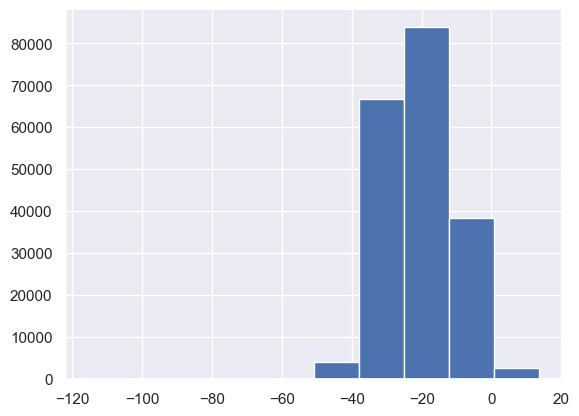

In [31]:
labels_new['pitch_diff'].hist()

<AxesSubplot: >

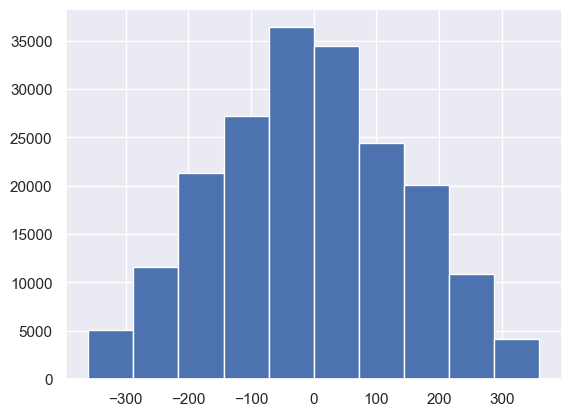

In [30]:
labels_new['heading_diff'].hist()

In [32]:
# save the data as a geojson file
labels_new.to_file('data/labels.geojson', driver='GeoJSON')

In [33]:
labels_new.to_csv('data/labels.csv', index=False)

In [9]:
# read data/labels.geojson
labels = gpd.read_file('data/labels.geojson')

In [10]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
0,18604,85055,CurbRamp,1.0,None,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,0.0,0.0,-162.806610,-16.532036,POINT (-122.33279 47.61860)
1,18608,85057,Obstacle,2.0,1,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,0.0,0.0,-125.758438,-22.210564,POINT (-122.33189 47.61781)
2,18608,85059,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33183 47.61751)
3,18608,85060,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33188 47.61752)
4,18608,85062,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,0.0,0.0,93.054062,-35.335564,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,None,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,0.0,0.0,117.338455,-34.842430,POINT (-122.26726 47.54077)
195539,76183,231285,NoSidewalk,5.0,None,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,0.0,0.0,-178.270432,-5.830536,POINT (-122.26344 47.55229)
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179 47.56327)
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165 47.56347)


In [3]:
# read data/gt_labels.geojson
g = gpd.read_file('data/gt_labels.geojson')

In [11]:
g

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry
0,19418,86788,SurfaceProblem,2.0,1,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869,POINT (-122.28125 47.69831)
1,21038,91037,CurbRamp,NaN,1,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782,POINT (-122.31625 47.55795)
2,22195,93842,CurbRamp,1.0,1,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354,POINT (-122.32889 47.59998)
3,47238,190528,CurbRamp,1.0,1,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160,POINT (-122.33860 47.69603)
4,47291,190672,CurbRamp,1.0,1,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163,POINT (-122.28343 47.54610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12807,16991,80049,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684,POINT (-122.28789 47.52785)
12808,16991,80051,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684,POINT (-122.28797 47.52796)
12809,17700,82303,CurbRamp,3.0,None,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411,POINT (-122.29849 47.54032)
12810,18083,83398,CurbRamp,NaN,1,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842,POINT (-122.37522 47.53018)


<AxesSubplot: >

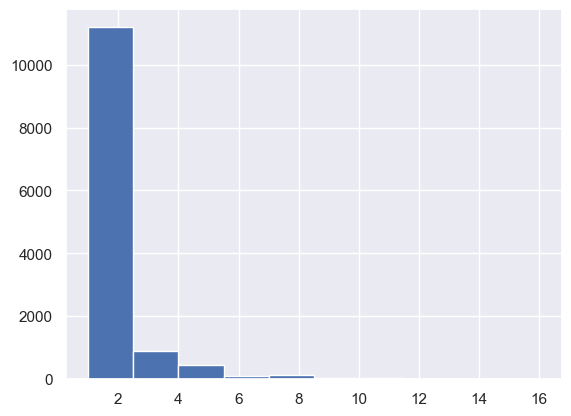

In [10]:
g['agree_count'].hist()

In [5]:
id_list= g['label_id'].unique().tolist()
gt_labels = labels[labels['label_id'].isin(id_list)]

NameError: name 'labels' is not defined

In [13]:
gt_labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
135,19418,86788,SurfaceProblem,2.0,1,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.69831)
457,21038,91037,CurbRamp,NaN,1,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31625 47.55795)
635,22195,93842,CurbRamp,1.0,1,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32889 47.59998)
653,47238,190528,CurbRamp,1.0,1,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.33860 47.69603)
654,47291,190672,CurbRamp,1.0,1,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343 47.54610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195174,16991,80049,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684,0.0,0.0,-83.354111,-21.165184,POINT (-122.28789 47.52785)
195175,16991,80051,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684,0.0,0.0,-164.916611,-11.102684,POINT (-122.28797 47.52796)
195255,17700,82303,CurbRamp,3.0,None,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411,0.0,0.0,114.896271,-30.428589,POINT (-122.29849 47.54032)
195317,18083,83398,CurbRamp,NaN,1,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842,0.0,0.0,-108.877907,-18.062414,POINT (-122.37522 47.53018)


In [14]:
# save the data as a csv file
gt_labels.to_csv('data/gt_labels.csv', index=False)

In [2]:
# read jon-mikey-validated-labels-seattle.csv
vt = pd.read_csv('data/jon-mikey-validated-labels-seattle.csv')
vt

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12866,232967,t,f
12867,232968,t,f
12868,232969,t,f
12869,232974,t,f


In [17]:
#select jon_validated =t
jon_true = vt[vt['jon_validated'] == 't']

In [20]:
jon_true

,label_id,mikey_validated,jon_validated
0,9,f,t
1,12,f,t
2,20,f,t
3,22,f,t
4,23,f,t
...,...,...,...
12641,222498,f,t
12687,223603,f,t
12750,225126,f,t
12770,226626,f,t


In [21]:
#read in json file jonfroehlich
jon = pd.read_json('data/jonfroehlich.json')
jon

,user_id,username,audit_task_id,street_edge_id,task_start,task_end,label_id,temporary_label_id,label_type
0,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,75854,742,SurfaceProblem
1,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73914,731,NoCurbRamp
2,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,75853,741,SurfaceProblem
3,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73912,729,CurbRamp
4,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,15426,7197,1560380474910,1562969926618,73918,732,NoCurbRamp
...,...,...,...,...,...,...,...,...,...
965,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194796,976,NoSidewalk
966,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194774,957,NoSidewalk
967,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194752,945,NoSidewalk
968,87833d72-b357-4e2c-81cd-23f58ff04c59,jonfroehlich,48610,16482,1643765569653,1643765906074,194776,959,NoSidewalk


In [22]:
#select only the label_id and create new dataframe
jon = jon[['label_id']]

In [28]:
#check if label_id in jon all is in jon_true and create new dataframe
jon_true = jon_true[jon_true['label_id'].isin(jon['label_id'])]
jon_true

,label_id,mikey_validated,jon_validated
6338,76344,f,t


In [11]:
# read jon-mikey-validated-labels-seattle-incorrect.csv
gt_incorrect = pd.read_csv('data/jon-mikey-validated-labels-incorrect.csv')

In [12]:
# read jon-mikey-validated-labels-seattle-incorrect.csv
gt_correct = pd.read_csv('data/jon-mikey-validated-labels-correct.csv')

In [13]:
gt_incorrect 

,city,label_id,mikey_validated,jon_validated
0,seattle,164,f,t
1,seattle,198,t,t
2,seattle,302,f,t
3,seattle,304,f,t
4,seattle,579,f,t
...,...,...,...,...
7255,spgg,108451,f,t
7256,spgg,108452,t,f
7257,spgg,109454,f,t
7258,zurich,86,t,f


In [14]:
# select only city = seattle
seattle_incorrect = gt_incorrect[gt_incorrect['city'] == 'seattle']

In [15]:
seattle_incorrect

,city,label_id,mikey_validated,jon_validated
0,seattle,164,f,t
1,seattle,198,t,t
2,seattle,302,f,t
3,seattle,304,f,t
4,seattle,579,f,t
...,...,...,...,...
3816,seattle,232744,t,f
3817,seattle,232747,t,f
3818,seattle,232753,t,f
3819,seattle,232927,t,f


In [16]:
id_list= seattle_incorrect['label_id'].unique().tolist()
gt_incorrect = labels[labels['label_id'].isin(id_list)]

In [17]:
gt_incorrect

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
355,20621,89703,Obstacle,5.0,0,True,kSoHmwB61ZXsiIRUdZgpDQ,0,3,1,16384.0,8192.0,10832,-840,720,480,200,206,2,306.022308,-26.696428,179.077042,-1.690369,0.0,0.0,126.945267,-25.006060,POINT (-122.36327 47.52814)
674,47331,191045,Obstacle,NaN,0,True,0Ba7hkghmVmIvM-Rg2izmw,1,2,0,16384.0,8192.0,2100,-333,720,480,396,87,1,51.732498,-32.937500,90.005928,0.173622,0.0,0.0,-38.273430,-33.111122,POINT (-122.33401 47.55348)
726,47560,191689,CurbRamp,2.0,0,False,uXuEDy41X5aDRuI1Yb7Ihg,0,1,0,16384.0,8192.0,7568,-410,720,480,430,242,1,193.250000,-11.000000,0.417549,0.740326,0.0,0.0,192.832451,-11.740326,POINT (-122.29926 47.55761)
796,48013,193010,NoCurbRamp,3.0,0,True,09oIB9wuc8xUoKX19Yj3VQ,0,2,0,16384.0,8192.0,2479,-643,720,480,227,252,3,72.046875,-17.750000,344.080353,1.376465,0.0,0.0,-272.033478,-19.126465,POINT (-122.31437 47.57156)
826,48379,193822,NoCurbRamp,NaN,0,True,CJ5zGhKTA_-FFp4MG_HLaQ,0,2,0,16384.0,8192.0,721,-516,720,480,50,138,1,60.812500,-34.250000,358.833984,-1.772690,0.0,0.0,-298.021484,-32.477310,POINT (-122.32046 47.70591)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194867,14016,65281,SurfaceProblem,3.0,0,True,5TVU8BDY3ZtYnRwYnLkFjw,0,1,0,16384.0,8192.0,3050,-597,720,480,582,253,1,49.455357,-17.437500,359.584869,0.085213,0.0,0.0,-310.129513,-17.522713,POINT (-122.32270 47.53272)
195170,16930,79862,SurfaceProblem,5.0,0,True,Tgdv_crZ2G73pDZs8Xo81w,0,2,0,3328.0,1664.0,10688,-420,720,480,280,195,2,295.883942,-15.598214,271.188171,-3.895775,0.0,0.0,24.695770,-11.702439,POINT (-122.33907 47.70144)
195172,16933,79880,SurfaceProblem,NaN,None,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,0,16384.0,8192.0,10818,-448,720,480,398,267,2,289.812500,-10.892858,269.897766,-1.949219,1.0,0.0,19.914734,-8.943639,POINT (-122.34081 47.70146)
195173,16933,79882,SurfaceProblem,5.0,None,True,D5wUl-EWRUD5bl8H1fDd-Q,1,1,0,16384.0,8192.0,11751,-945,720,480,202,205,2,331.508942,-29.910715,269.897766,-1.949219,1.0,1.0,61.611176,-27.961496,POINT (-122.34073 47.70146)


In [18]:
seattle_correct = gt_correct[gt_correct['city'] == 'seattle']
seattle_correct

,city,label_id,mikey_validated,jon_validated
0,seattle,9,f,t
1,seattle,12,f,t
2,seattle,20,f,t
3,seattle,22,f,t
4,seattle,23,f,t
...,...,...,...,...
12922,seattle,233162,t,f
12923,seattle,233167,t,f
12924,seattle,233171,t,f
12925,seattle,233172,t,f


In [19]:
id_list= seattle_correct['label_id'].unique().tolist()
gt_correct = labels[labels['label_id'].isin(id_list)]
gt_correct

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
135,19418,86788,SurfaceProblem,2.0,1,False,BpVD1H9f1A6URlrjPUcyZg,2,0,0,13312.0,6656.0,5686,-209,720,480,155,237,1,183.062500,-7.125000,358.678406,6.516869,0.0,0.0,-175.615906,-13.641869,POINT (-122.28125 47.69831)
457,21038,91037,CurbRamp,NaN,1,True,g0kskJSQVRkZXwH8mmA3gA,1,0,0,16384.0,8192.0,1477,-902,720,480,392,173,1,34.062500,-35.000000,99.724670,-2.702782,0.0,0.0,-65.662170,-32.297218,POINT (-122.31625 47.55795)
635,22195,93842,CurbRamp,1.0,1,True,npPLy6aGDOcUNgSXA4sq8Q,1,0,0,16384.0,8192.0,6495,-297,720,480,361,170,1,175.187500,-19.250000,299.396454,2.216354,0.0,0.0,-124.208954,-21.466354,POINT (-122.32889 47.59998)
653,47238,190528,CurbRamp,1.0,1,True,KIOwpToFQQi4QK6hxq2Jjg,1,0,0,16384.0,8192.0,1696,-659,720,480,448,255,1,31.437500,-16.187500,132.761383,-1.222160,0.0,0.0,-101.323883,-14.965340,POINT (-122.33860 47.69603)
654,47291,190672,CurbRamp,1.0,1,True,00WCIfeoGC33NDp8s0_KGg,1,0,0,16384.0,8192.0,12331,-747,720,480,336,306,2,335.875000,-15.803572,180.815201,0.315163,0.0,0.0,155.059799,-16.118734,POINT (-122.28343 47.54610)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195174,16991,80049,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,4131,-496,720,480,469,215,1,94.750000,-18.437500,178.104111,2.727684,0.0,0.0,-83.354111,-21.165184,POINT (-122.28789 47.52785)
195175,16991,80051,CurbRamp,1.0,1,True,rjH-Z_Ba6fC6JazX7WCkdw,1,0,0,16384.0,8192.0,643,-591,720,480,384,291,1,13.187500,-8.375000,178.104111,2.727684,0.0,0.0,-164.916611,-11.102684,POINT (-122.28797 47.52796)
195255,17700,82303,CurbRamp,3.0,None,True,eYuHkS8M4C_6rWOXE1MAOw,1,1,0,16384.0,8192.0,6872,-1581,720,480,338,316,1,190.875000,-31.625000,75.978729,-1.196411,0.0,0.0,114.896271,-30.428589,POINT (-122.29849 47.54032)
195317,18083,83398,CurbRamp,NaN,1,False,9HbBPwLAbnJ57f3Iv0Sl9A,1,0,0,16384.0,8192.0,2818,-593,720,480,145,237,2,93.035713,-17.678572,201.913620,0.383842,0.0,0.0,-108.877907,-18.062414,POINT (-122.37522 47.53018)


In [20]:
# add column 'verified' to gt_correct and gt_incorrect
gt_correct['verified'] = 1
gt_incorrect['verified'] = 0

In [63]:
# read data curb_fp.csv
curb_fp = pd.read_csv('data/curb_fp.csv')

In [65]:
id_list= curb_fp['label_id'].unique().tolist()
curb_fp = labels[labels['label_id'].isin(id_list)]
curb_fp


,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry
71,18927,85882,CurbRamp,1.0,None,False,yLFcq-aaf-Ag_iITWsAWnQ,0,0,0,16384.0,8192.0,267,-286,720,480,169,141,1,34.671875,-24.8750,90.021843,1.101685,0.0,0.0,-55.349968,-25.976685,POINT (-122.31106 47.57791)
96,19027,86190,CurbRamp,1.0,1,False,4vGkAd8TMCx4FgyoDV7Pmw,1,0,0,13312.0,6656.0,9670,-613,720,480,305,283,1,270.000000,-10.0000,90.147316,-9.087791,0.0,0.0,179.852684,-0.912209,POINT (-122.37005 47.63957)
111,19143,86478,CurbRamp,1.0,None,False,JXW_FToo2iFIB0NslFrCeg,0,0,0,16384.0,8192.0,6333,-117,720,480,193,153,1,195.500000,-17.8750,350.722260,2.929657,0.0,0.0,-155.222260,-20.804657,POINT (-122.32839 47.69757)
131,19411,86767,CurbRamp,1.0,None,False,Z1u8iq5TEuS8-n_kZKRc8A,0,0,0,16384.0,8192.0,7382,-562,720,480,526,315,1,174.437500,-5.8750,156.979935,-0.590858,0.0,0.0,17.457565,-5.284142,POINT (-122.28333 47.70015)
132,19411,86768,CurbRamp,1.0,1,False,Z1u8iq5TEuS8-n_kZKRc8A,1,0,0,16384.0,8192.0,4314,-310,720,480,285,212,1,128.500000,-13.0000,156.979935,-0.590858,0.0,0.0,-28.479935,-12.409142,POINT (-122.28310 47.70015)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195455,18558,84922,CurbRamp,NaN,None,False,-B8963iDbur4NYIYzdTJXA,0,0,0,16384.0,8192.0,12834,-528,720,480,505,230,1,324.500000,-17.8125,220.064758,-4.507965,0.0,0.0,104.435242,-13.304535,POINT (-122.33838 47.61270)
195473,75784,230293,CurbRamp,1.0,None,True,3KIM9a467DImsFzpQ9xAqQ,0,0,0,16384.0,8192.0,6398,-380,720,480,449,120,3,169.227676,-15.8750,22.459303,2.169060,0.0,0.0,146.768373,-18.044060,POINT (-122.29076 47.55688)
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.0000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179 47.56327)
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.0000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165 47.56347)


In [66]:
curb_fp['verified'] = 0

In [67]:
#concat gt_correct and gt_incorrect and curb_fp
gt = pd.concat([gt_correct, gt_incorrect, curb_fp])

In [70]:
# save the data as a csv file
gt.to_csv('data/gt.csv', index=False)

In [ ]:
# change heading_dff into absolute value
gt['heading_diff'] = gt['heading_diff'].abs()

In [31]:
gt_3 = pd.concat([gt_correct, gt_incorrect])

In [35]:
gt_3
#select verified and label id
gt_3 = gt_3[['verified', 'label_id']]

In [39]:
#merge gt_3 with gt2
gt_3 = pd.merge(gt_3, gt2, on='label_id', how='left')

In [38]:
# read gt2 csv
gt2 = pd.read_csv('data/gt_2.csv')

In [29]:
id_list= gt_2['label_id'].unique().tolist()
gt_2 = labels[labels['label_id'].isin(id_list)]

In [5]:
# read data/labels.csc
labels = pd.read_csv('data/labels.csv')

In [28]:
labels

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
0,18604,85055,CurbRamp,1.0,NaN,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,0.0,0.0,-162.806610,-16.532036,POINT (-122.3327865600586 47.61859893798828),-1
1,18608,85057,Obstacle,2.0,1.0,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,0.0,0.0,-125.758438,-22.210564,POINT (-122.3318862915039 47.61780548095703),-1
2,18608,85059,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33183288574219 47.61751174926758),-1
3,18608,85060,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,0.0,0.0,-32.945938,-24.835564,POINT (-122.33187866210938 47.61751937866211),-1
4,18608,85062,CurbRamp,1.0,NaN,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,0.0,0.0,93.054062,-35.335564,POINT (-122.33204650878906 47.617637634277344),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196809,76181,231270,CurbRamp,1.0,NaN,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,0.0,0.0,117.338455,-34.842430,POINT (-122.26725769042969 47.540771484375),-1
196810,76183,231285,NoSidewalk,5.0,NaN,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,0.0,0.0,-178.270432,-5.830536,POINT (-122.26344299316406 47.55229187011719),-1
196811,76193,231338,CurbRamp,1.0,NaN,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,0.0,0.0,75.602585,-34.037560,POINT (-122.28179168701172 47.563270568847656),-1
196812,76193,231339,CurbRamp,1.0,NaN,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,0.0,0.0,-69.053223,-33.906600,POINT (-122.28165435791016 47.56346893310547),-1


In [9]:
#select label_id that are duploicated
labels[labels.duplicated(['label_id'], keep=False)]



,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,geometry,clustered
469,21068,91127,Obstacle,4.0,1.0,False,P586mvMreriaAY4WrAsK0A,1,0,0,16384.0,8192.0,9233,-266,720,480,207,175,1,272.1875,-18.5625,220.627335,0.295410,0.0,1.0,51.560165,-18.857910,POINT (-122.33183288574219 47.617733001708984),0
470,21068,91127,Obstacle,4.0,1.0,False,P586mvMreriaAY4WrAsK0A,1,0,0,16384.0,8192.0,9233,-266,720,480,207,175,1,272.1875,-18.5625,220.627335,0.295410,0.0,1.0,51.560165,-18.857910,POINT (-122.33183288574219 47.617733001708984),0
647,22283,93956,Obstacle,5.0,1.0,True,chXMp7X0XlFEwOAfoC_qhg,2,0,0,16384.0,8192.0,1266,-585,720,480,542,207,1,6.6250,-23.1875,358.517639,1.675537,1.0,0.0,-351.892639,-24.863037,POINT (-122.30547332763672 47.584869384765625),0
648,22283,93956,Obstacle,5.0,1.0,True,chXMp7X0XlFEwOAfoC_qhg,2,0,0,16384.0,8192.0,1266,-585,720,480,542,207,1,6.6250,-23.1875,358.517639,1.675537,1.0,0.0,-351.892639,-24.863037,POINT (-122.30547332763672 47.584869384765625),0
729,47560,191677,Obstacle,5.0,1.0,False,12I9sTkiFpccfiSur1DQ7Q,2,0,1,16384.0,8192.0,7506,-302,720,480,434,172,1,191.1875,-19.2500,0.245369,0.666191,0.0,0.0,190.942131,-19.916191,POINT (-122.29925537109375 47.55821228027344),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196431,16863,79654,Obstacle,5.0,1.0,True,hWAPI6WAB8KS-nRtbKERJQ,1,0,1,13312.0,6656.0,8599,-848,720,480,259,214,1,249.9375,-28.6250,182.575684,-0.922882,1.0,0.0,67.361816,-27.702118,POINT (-122.30183410644531 47.66425704956055),0
196495,17406,81422,Obstacle,5.0,1.0,False,NLCwbMYXSVF5DipOhvI-HA,1,0,0,16384.0,8192.0,10469,-579,720,480,541,212,1,255.9375,-22.7500,58.096825,-2.593750,0.0,1.0,197.840675,-20.156250,POINT (-122.33792114257812 47.605018615722656),0
196496,17406,81422,Obstacle,5.0,1.0,False,NLCwbMYXSVF5DipOhvI-HA,1,0,0,16384.0,8192.0,10469,-579,720,480,541,212,1,255.9375,-22.7500,58.096825,-2.593750,0.0,1.0,197.840675,-20.156250,POINT (-122.33792114257812 47.605018615722656),0
196526,17701,82310,Obstacle,5.0,1.0,True,0ZmRms_2bNRj_7R83vE_Lg,4,0,0,16384.0,8192.0,3486,-397,720,480,365,168,1,93.0000,-22.6875,139.031387,-1.654922,1.0,0.0,-46.031387,-21.032578,POINT (-122.29817962646484 47.53962326049805),1


In [41]:
#save the gt3 as a csv file
gt_3.to_csv('data/gt_3.csv', index=False)


<AxesSubplot: >

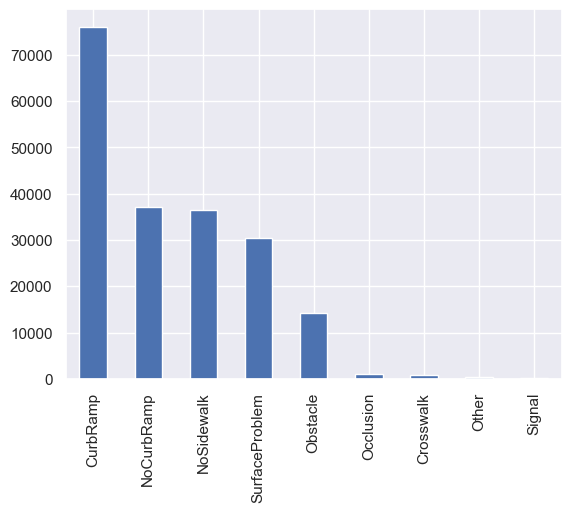

In [6]:
#plot lables by label_type
labels['label_type'].value_counts().plot(kind='bar')


In [10]:
#read gt_3 csv
gt_3 = pd.read_csv('data/gt_3.csv')

In [13]:
#gt_3 summart statistics
gt_3.describe()#

,verified,label_id,audit_task_id,severity,correct,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,label_tags,label_description,heading_diff,pitch_diff,clustered
count,16890.000000,16890.000000,16890.000000,16105.000000,15420.000000,16890.000000,16890.000000,16890.000000,16786.000000,16786.000000,16890.000000,16890.000000,16890.0,16890.0,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000,16890.000000
mean,0.777798,91975.108585,22853.384843,2.766284,0.818807,1.462996,0.451806,0.051569,16193.761468,8096.880734,6543.550385,-599.240557,720.0,480.0,349.555062,209.725873,1.527294,177.662604,-20.946830,184.857476,0.289108,0.089698,0.002842,-7.194871,-21.235939,0.099704
std,0.415739,68248.645657,17766.978364,1.379996,0.385191,1.285180,0.875562,0.250771,866.122892,433.061446,3858.249683,291.682793,0.0,0.0,133.621674,65.327654,0.733228,105.180765,9.766347,108.697889,2.802328,0.285757,0.053235,150.843405,10.178187,0.771713
min,0.000000,9.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3328.000000,1664.000000,0.000000,-2280.000000,720.0,480.0,-57.000000,32.000000,1.000000,0.000000,-35.000000,0.001568,-14.317596,0.000000,0.000000,-359.706421,-48.468506,-1.000000
25%,1.000000,28284.250000,7205.500000,2.000000,1.000000,1.000000,0.000000,0.000000,16384.000000,8192.000000,3095.250000,-740.750000,720.0,480.0,252.000000,163.000000,1.000000,86.780691,-29.750000,90.138325,-1.064226,0.000000,0.000000,-112.139872,-29.885026,-1.000000
50%,1.000000,88817.000000,20340.000000,3.000000,1.000000,1.000000,0.000000,0.000000,16384.000000,8192.000000,6323.000000,-551.000000,720.0,480.0,347.000000,205.000000,1.000000,175.312500,-20.689733,179.925705,0.256599,0.000000,0.000000,-4.988800,-20.976498,0.000000
75%,1.000000,152921.000000,38383.000000,4.000000,1.000000,2.000000,1.000000,0.000000,16384.000000,8192.000000,9908.750000,-400.000000,720.0,480.0,442.000000,252.000000,2.000000,270.000000,-13.437500,270.268250,1.684401,0.000000,0.000000,102.373073,-13.505008,1.000000
max,1.000000,233173.000000,76737.000000,5.000000,1.000000,16.000000,15.000000,7.000000,16384.000000,8192.000000,13308.000000,232.000000,720.0,480.0,719.000000,468.000000,3.000000,360.000000,0.000000,359.999207,15.560028,1.000000,1.000000,359.477934,13.427628,1.000000


In [14]:
gt_3.count()

verified                16890
label_id                16890
audit_task_id           16890
label_type              16890
severity                16105
correct                 15420
high_quality_user       16890
gsv_panorama_id         16890
agree_count             16890
disagree_count          16890
notsure_count           16890
image_width             16786
image_height            16786
sv_image_x              16890
sv_image_y              16890
canvas_width            16890
canvas_height           16890
canvas_x                16890
canvas_y                16890
zoom                    16890
heading                 16890
pitch                   16890
photographer_heading    16890
photographer_pitch      16890
label_tags              16890
label_description       16890
heading_diff            16890
pitch_diff              16890
geometry                16890
clustered               16890
dtype: int64

In [15]:
16890/196814

0.08581706585913604